In [58]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

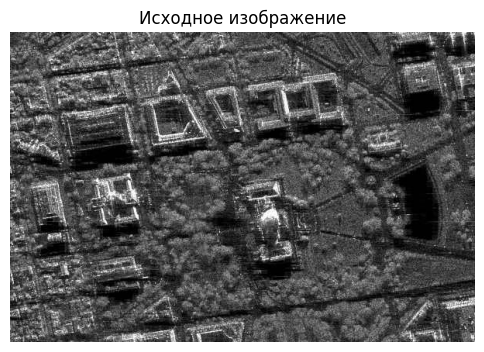

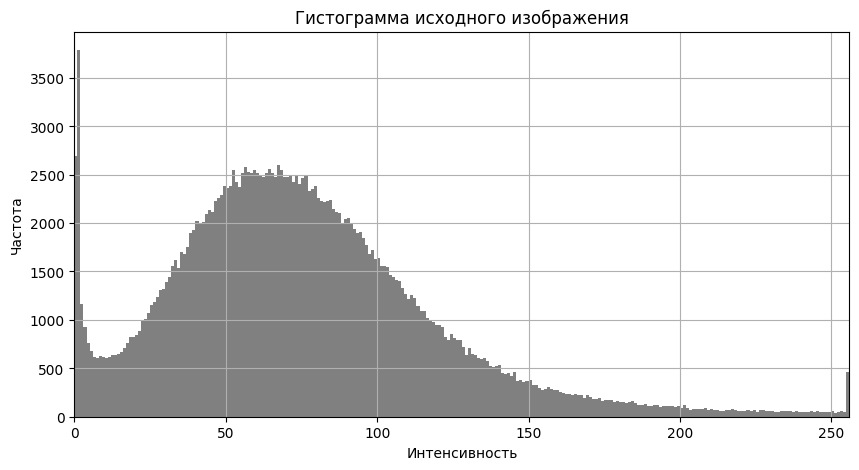

In [59]:
# Загрузка изображения
image_path = 'sar_1_gray.jpg'  
image = cv2.imread(image_path)

# Преобразование в градации серого
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Отображение исходного изображения
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

# Построение гистограммы
plt.figure(figsize=(10, 5))
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Гистограмма исходного изображения')
plt.xlabel('Интенсивность')
plt.ylabel('Частота')
plt.xlim([0, 256])
plt.grid()
plt.show()

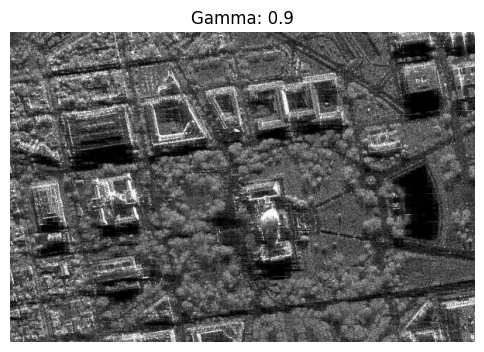

Gamma: 0.9 -> MSE: 65.61, SSIM: 0.9912


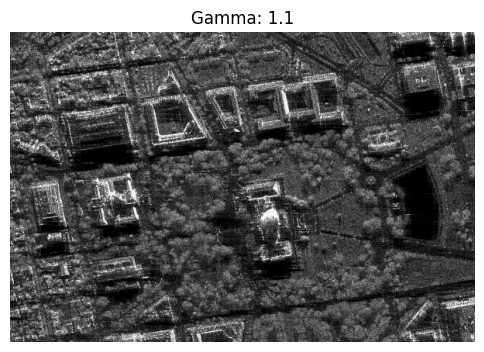

Gamma: 1.1 -> MSE: 64.54, SSIM: 0.9869


In [60]:
# Gamma коррекция
gamma_values = [0.9, 1.1]  

for gamma in gamma_values:
    normalized_image = gray_image / 255.0
    corrected_image = np.power(normalized_image, gamma)
    corrected_image = np.uint8(corrected_image * 255)
    
    # Отображение скорректированного изображения
    plt.figure(figsize=(6, 6))
    plt.imshow(corrected_image, cmap='gray')
    plt.title(f'Gamma: {gamma}')
    plt.axis('off')
    plt.show()
    
    # Вычисление MSE и SSIM
    mse_value = np.sum((gray_image.astype("float") - corrected_image.astype("float")) ** 2)
    mse_value /= float(gray_image.shape[0] * gray_image.shape[1])
    ssim_value = ssim(gray_image, corrected_image, multichannel=False)
    print(f'Gamma: {gamma} -> MSE: {mse_value:.2f}, SSIM: {ssim_value:.4f}')

# Статистическая цветокоррекция
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eq_gray = cv2.equalizeHist(gray_image)

b, g, r = cv2.split(image)
b_eq = cv2.equalizeHist(b)
g_eq = cv2.equalizeHist(g)
r_eq = cv2.equalizeHist(r)

statistical_corrected_image = cv2.merge((b_eq, g_eq, r_eq))

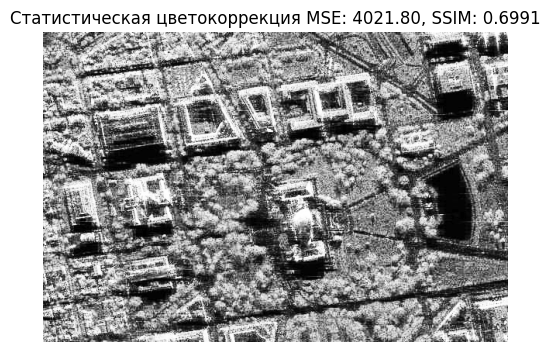

In [61]:
# Вычисление MSE и SSIM для статистической коррекции
mse_statistical = np.sum((gray_image.astype("float") - cv2.cvtColor(statistical_corrected_image, cv2.COLOR_BGR2GRAY).astype("float")) ** 2)
mse_statistical /= float(gray_image.shape[0] * gray_image.shape[1])
ssim_statistical = ssim(gray_image, cv2.cvtColor(statistical_corrected_image, cv2.COLOR_BGR2GRAY), multichannel=False)

# Отображение изображения с статистической цветокоррекцией
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(statistical_corrected_image, cv2.COLOR_BGR2RGB))
plt.title(f'Статистическая цветокоррекция MSE: {mse_statistical:.2f}, SSIM: {ssim_statistical:.4f}')
plt.axis('off')
plt.show()

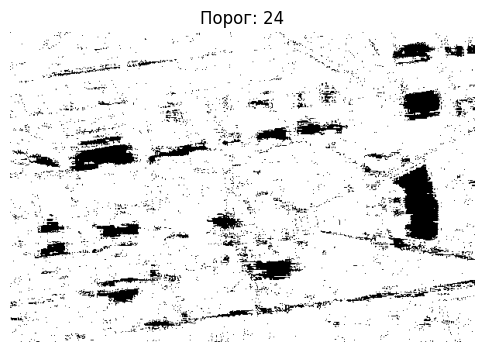

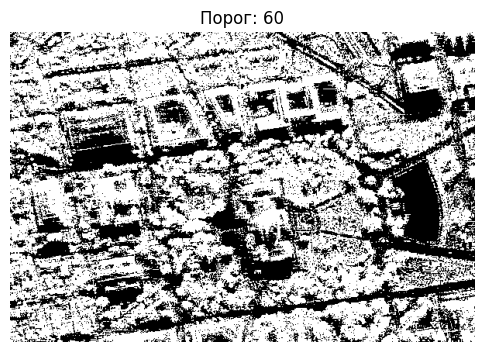

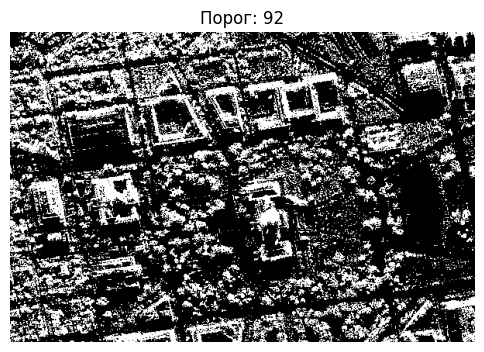

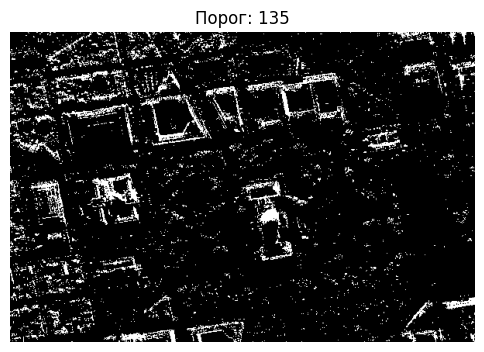

In [62]:
# Пороговая фильтрация
thresholds = [24, 60, 92, 135]

for threshold in thresholds:
    _, thresholded_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)

    # Отображение порогового изображения
    plt.figure(figsize=(6, 6))
    plt.imshow(thresholded_image, cmap='gray')
    plt.title(f'Порог: {threshold}')
    plt.axis('off')
    plt.show()